In [250]:
import numpy as np
import matplotlib.pyplot as guille
from pandas import read_excel

### 1. Representación del ciclo de histéresis. ¿Saturación?

In [259]:
data = []
with open('redatoshisteresis/primerciclosex') as f:
    for line in f.readlines():
        data.append(np.fromstring(line.replace(",", "."), dtype = float, sep = "\t"))
#Esto puede ser lo más cursed que he hecho en mi vida. Pero tira.

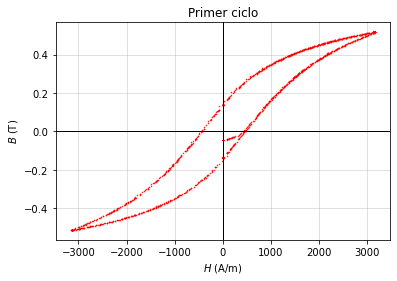

In [260]:
x = []
y = []
µ0 = 4 * np.pi * 1e-7

for elem in data:
    x.append(-elem[0])
    y.append(-elem[1])
    
guille.plot(x, y, "r.", markersize = 1)
guille.xlabel("$H$ (A/m)")
guille.ylabel("$B$ (T)")
guille.grid(alpha = 0.5)
guille.title("Primer ciclo")
guille.axhline(y = 0, color = 'k', linewidth = 1)
guille.axvline(x = 0, color = 'k', linewidth = 1)

### 2. Proceso de datos del ciclo

a) Campo coercitivo

In [5]:
for elem in y:
    if -0.002 <= elem <= 0.002:
        print(x[y.index(elem)], x[y.index(elem) + 1], x[y.index(elem) - 1])


427.538 438.187 376.265
-438.976 -442.92 -439.765
-438.976 -442.92 -439.765
-441.342 -464.218 -442.92
427.538 438.187 376.265


b) Imanación remanente

In [82]:
for elem in x:
    if -0.1 <= elem <= 0.1:
        print((y[x.index(elem)] - µ0 * x[x.index(elem)]) * µ0**-1 , (y[x.index(elem) + 1] - µ0 * x[x.index(elem) + 1])*µ0**-1 , (y[x.index(elem) - 1] - µ0 * x[x.index(elem) - 1])*µ0**-1)

109021.2130179483 109022.9850179483 109022.80501794831
-107429.58658702936 -107430.07458702936 -108225.18130248884
109816.92373340779 109816.0507334078 109814.62473340779


b2) Imanación de saturación

In [7]:
print([max(x), y[x.index(max(x))]], [min(x), y[x.index(min(x))]])

[3161.852, 0.516] [-3157.919, -0.512]


c) Magnetización inicial for gráfica polla y huevos.

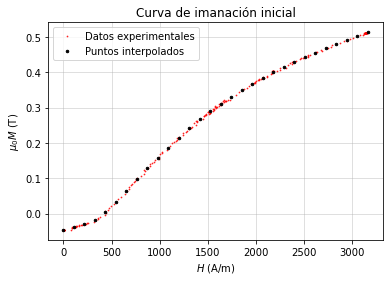

In [255]:

M = [(y[i] - µ0*x[i]) for i in range(len(y[0:x.index(max(x))]))]

guille.plot(x[0:x.index(max(x))], M, "r.", markersize = 1.5, alpha = 0.8, 
            label = "Datos experimentales")
guille.grid(alpha = 0.5)
guille.title("Curva de imanación inicial")
guille.xlabel("$H$ (A/m)")
guille.ylabel("$\mu_0M$ (T)")
#guille.axhline(y = 0, color = "k", linewidth = 1)
#guille.axvline(x = 0, color = "k", linewidth = 1)

z = np.polyfit(x[0:x.index(max(x))], M, 14)
def fit(t):
    r = 0
    for i in range(len(z)):
        r += z[i] * t**(len(z) - (1 + i))
    return r

#v = [fit(elem) for elem in x[0:x.index(max(x))]]
#guille.plot(x[0:x.index(max(x))], v)
n = 30 #Número de puntos que se tendrán en cuenta para la derivada.
w = [fit(elem) for elem in np.linspace(0, max(x), n)]
guille.plot(np.linspace(0, max(x), n), w, "k.", markersize = 5, label = "Puntos interpolados")
guille.legend()

c2) Susceptibilidad

In [121]:
#SUSceptibilidad 
chi = []
for i in range(len(w)):
    if i < 1:
        chi.append((w[i + 1] - w[i]) / (np.linspace(0, max(x), n)[i + 1] - np.linspace(0, max(x), n)[i]))
    elif i >= 1 and i < len(w) - 1:
        chi.append((w[i + 1] - w[i - 1]) / (np.linspace(0, max(x), n)[i + 1] - np.linspace(0, max(x), n)[i - 1]))
    else:
        chi.append((w[i] - w[i - 1]) / (np.linspace(0, max(x), n)[i] - np.linspace(0, max(x), n)[i - 1]))

Text(0.5, 0, '$M$ (kA/m)')

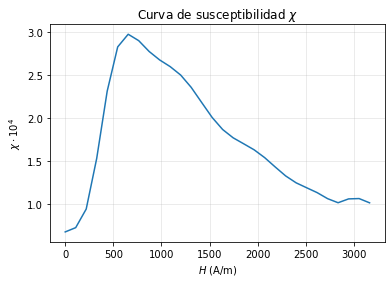

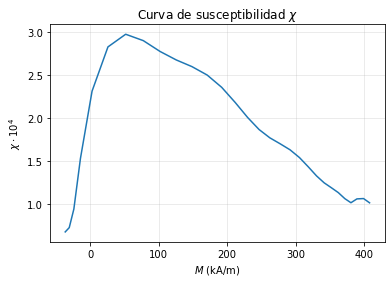

In [163]:
superchi = [chi[i] * 10000 for i in range(len(chi))]
guille.figure(1)
guille.plot(np.linspace(0, max(x), n), superchi)
guille.grid(alpha = 0.3)
guille.title("Curva de susceptibilidad $\chi$")
guille.xlabel("$H$ (A/m)")
guille.ylabel("$\chi \cdot 10^4$")

w0 = [w[i]/µ0 * 1e-3 for i in range(len(w))]
guille.figure(2)
guille.plot(w0, superchi)
guille.grid(alpha = 0.3)
guille.title("Curva de susceptibilidad $\chi$")
guille.ylabel("$\chi \cdot 10^4$")
guille.xlabel("$M$ (kA/m)")

c3) Permeabilidad relativa

Text(0, 0.5, '$\\mu_r$')

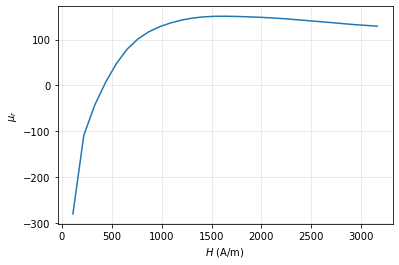

In [164]:
µr = [w[i + 1]/(µ0 * np.linspace(0, max(x), n)[i + 1]) for i in range(len(w) - 1)]
guille.plot(np.linspace(0, max(x), n)[1:], µr)
guille.grid(alpha = 0.3)
guille.xlabel("$H$ (A/m)")
guille.ylabel("$\mu_r$")

c4) Pérdida de energía 



In [212]:
#Voy a coger solo la mitad que está en el lado negativo del ciclo 1. 
#La energía disipada será la diferencia entre la integral de "lo de arriba" y "lo de abajo".
negvals = []
intvals = []
for elem in x:
    if elem < 0:
        negvals.append(elem)
        intvals.append(y[x.index(elem)])
#Ya tenemos todos los valores que se van a necesitar para hacer las dos integrales.
#Voy a separar las listas en cada integral.
cin = negvals.index(min(negvals))
zin = intvals.index(-0.0)

ins = intvals[:zin]
inn = intvals[zin:cin]
ini = intvals[cin:]

xs = negvals[:zin]
xn = negvals[zin:cin]
xi = negvals[cin:]

IS = np.trapz(ins, xs)
IN = np.trapz(inn, xn)
II = np.trapz(ini, xi)

print('{}, {}, {}: {}'.format(IS, IN, II, -IS - IN - II))

-32.809715000000004, 833.5658885, -1208.7802729999999: 408.0240994999998


### 3. Ciclos menores 

a) (cycle minors)

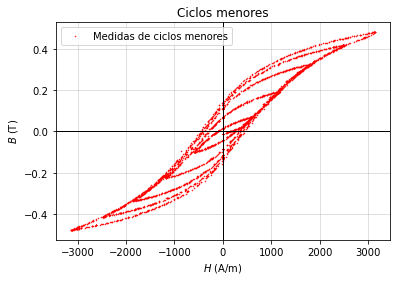

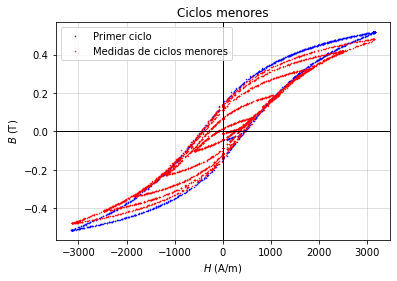

In [184]:
datam = []
with open('redatoshisteresis/ciclosmenoressex') as f:
    for line in f.readlines():
        datam.append(np.fromstring(line.replace(",", "."), dtype = float, sep = "\t"))
xm = []
ym = []
for elem in datam:
    xm.append(-elem[0])
    ym.append(-elem[1])
guille.figure(1)
guille.plot(xm, ym, "r.", markersize = 1, label = "Medidas de ciclos menores")
guille.xlabel("$H$ (A/m)")
guille.ylabel("$B$ (T)")
guille.grid(alpha = 0.5)
guille.title("Ciclos menores")
guille.axhline(y = 0, color = 'k', linewidth = 1)
guille.axvline(x = 0, color = 'k', linewidth = 1)
guille.legend()


guille.figure(2)
guille.plot(x, y, "b.", markersize = 1, label = "Primer ciclo")
guille.plot(xm, ym, "r.", markersize = 1, label = "Medidas de ciclos menores")
guille.xlabel("$H$ (A/m)")
guille.ylabel("$B$ (T)")
guille.grid(alpha = 0.5)
guille.title("Ciclos menores")
guille.axhline(y = 0, color = 'k', linewidth = 1)
guille.axvline(x = 0, color = 'k', linewidth = 1)
guille.legend()

b) Curva de conmutación vs imanación inicial

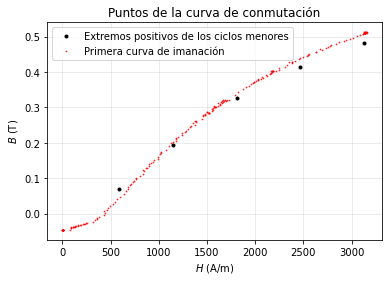

In [254]:
con = read_excel("redatoshisteresis/data.xlsx", sheet_name = "Sheet2").to_numpy()
guille.plot(-con[:,0], -con[:,1], "k.", markersize = 6, label = "Extremos positivos de los ciclos menores")
guille.plot(x[0:x.index(max(x))], M, "r.", markersize = 1.5, alpha = 0.8, 
            label = "Primera curva de imanación")
guille.grid(alpha = 0.3)
guille.xlabel("$H$ (A/m)")
guille.ylabel("$B$ (T)")
#guille.axhline(y = 0, color = "k", linewidth = 1)
#guille.axvline(x = 0, color = "k", linewidth = 1)
guille.title("Puntos de la curva de conmutación")
guille.legend()
